In [1]:
# from astropy.io import fits 

In [2]:
# import astropy.io

# Log Cube (+ tutorial code from website)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy import wcs
from astropy.io import fits
from matplotlib import cm
import scipy.stats as stats
import math
from scipy.optimize import curve_fit

# cube = fits.open('/Users/natachaupra/Desktop/manga-7443-12703-LOGCUBE.fits.gz')
# cube = fits.open('/Users/User/Downloads/manga-7443-12703-LOGCUBE.fits.gz')

# Re-order FLUX, IVAR, and MASK arrays from (wavelength, DEC, RA) to (RA, DEC, wavelength).
# From (lambda, y, x) to (x, y, lambda)

# flux = np.transpose(cube['FLUX'].data, axes=(2, 1, 0))
# ivar = np.transpose(cube['IVAR'].data, axes=(2, 1, 0))
# mask = np.transpose(cube['MASK'].data, axes=(2, 1, 0))

# wave = cube['WAVE'].data
# flux_header = cube['FLUX'].header

In [2]:
# x_center = int(flux_header['CRPIX1']) - 1
# y_center = int(flux_header['CRPIX2']) - 1

# plt.plot(wave, flux[x_center, y_center])
# plt.xlabel('$\lambda \, [\AA]$')
# plt.ylabel(flux_header['BUNIT'])

In [3]:
# print(len(cube['FLUX'].data))

In [4]:
# do_not_use = (mask & 2**10) != 0
# flux_m = np.ma.array(flux, mask=do_not_use)

# redshift = 0.0402719
# ind_wave = np.where((wave / (1 + redshift) > 6550) & (wave / (1 + redshift) < 6680))[0]
# halpha = flux_m[:, :, ind_wave].sum(axis=2)
# im = halpha.T

# # Convert from array indices to arcsec relative to IFU center
# dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
# dy = flux_header['CD2_2'] * 3600.  # deg to arcsec
# x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
# print(x_extent)
# y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy
# extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]


In [5]:
# plt.imshow(im, extent=extent, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
# plt.colorbar(label=flux_header['BUNIT'])
# plt.xlabel('arcsec')
# plt.ylabel('arcsec')

# Data 8312-12701 LOGCUBE

In [6]:
data = fits.open("/Users/natachaupra/Downloads/manga-8312-12701-LOGCUBE.fits.gz")
# data = fits.open('/Users/User/Downloads/manga-8312-12701-LOGCUBE.fits.gz')

In [7]:
wave = data['WAVE'].data

In [7]:
data.info()

Filename: /Users/natachaupra/Downloads/manga-8312-12701-LOGCUBE.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  FLUX          1 ImageHDU       100   (76, 76, 4563)   float32   
  2  IVAR          1 ImageHDU        17   (76, 76, 4563)   float32   
  3  MASK          1 ImageHDU        17   (76, 76, 4563)   int32   
  4  DISP          1 ImageHDU        11   (76, 76, 4563)   float32   
  5  PREDISP       1 ImageHDU        11   (76, 76, 4563)   float32   
  6  WAVE          1 ImageHDU         9   (4563,)   float64   
  7  SPECRES       1 ImageHDU         9   (4563,)   float64   
  8  SPECRESD      1 ImageHDU         9   (4563,)   float64   
  9  PRESPECRES    1 ImageHDU         9   (4563,)   float64   
 10  PRESPECRESD    1 ImageHDU         9   (4563,)   float64   
 11  OBSINFO       1 BinTableHDU    148   9R x 65C   [25A, 17A, 5A, J, I, 8A, E, E, E, E, E, E, J, J, I, J, E, 12A, J, 8A, E, E, E, E, E, E, E, E, E, E

In [8]:
data[0].header

SIMPLE  =                    T /                                                
BITPIX  =                    8 /                                                
NAXIS   =                    0 /                                                
EXTEND  =                    T /                                                
AUTHOR  = 'Brian Cherinka & David Law <bcherin1@jhu.edu, dlaw@stsci.edu>' /     
VERSDRP2= 'v2_4_3  '           / MaNGA DRP version (2d processing)              
VERSDRP3= 'v2_4_3  '           / MaNGA DRP Version (3d processing)              
VERSPLDS= 'v2_52   '           / Platedesign Version                            
VERSFLAT= 'v1_31   '           / Specflat Version                               
VERSCORE= 'v1_6_2  '           / MaNGAcore Version                              
VERSPRIM= 'v2_5    '           / MaNGA Preimaging Version                       
VERSUTIL= 'v5_5_32 '           / Version of idlutils                            
VERSIDL = 'x86_64 linux unix

In [10]:
# data[1].header

In [13]:
# for i in range(2014,2020):

# for j in range(30,31):
#         print(data['FLUX'].data[2021][j])
        
#     print(len(data['FLUX'].data[i]))

In [14]:
# Re-order FLUX, IVAR, and MASK arrays from (wavelength, DEC, RA) to (RA, DEC, wavelength).
# From (lambda, y, x) to (x, y, lambda)
flux = np.transpose(data['FLUX'].data, axes=(2, 1, 0))
ivar = np.transpose(data['IVAR'].data, axes=(2, 1, 0))
mask = np.transpose(data['MASK'].data, axes=(2, 1, 0))

# Ivar = inverse variance

In [15]:
print(flux[30][30][2021])

# flux density at sky coordinate at RA value given at index 30, DEC value given at index 30, 
# and wavelength value given at index 2021


0.100877516


## Questions

In [16]:
# explain the structure of the data again 
# so the flux data gives the flux density value at point x, y in the sky ?
# there are 76 * 76 points in the sky ( 2d plane ) ?
# why are there 4563 wavelengths at any point x, y ?
# why are there over 6000 values in the x axis of the graph 
# where do we actually get the value of the wavelength ?
# what exactly is this wavelength ? As in, it is the wavelength of what ?



# Accoridng to the unit, the flux density is luminosity per unit time, per unit area, per unit wavelength, per spaxel

In [17]:
# plt.cm.datad.keys() #color dictionary

## Flux denstiy at one wavelength (?) - index 2021 


need to make flux_at_wavelength_2021 to be a 2d array and plot a 2d image

In [18]:
# # choose wavelength to be at index 2021 ... because why not ? 

# flux_at_wavelength_2021 = []


# for i in range(76):
#     for j in range(76):
#         flux_at_wavelength_2021.append([i,j,flux[i][j][2000]])
#         arrayy.append([i,j,flux[i][j][200]])

In [19]:
# for i in range(5000):
#     print(flux_at_wavelength_2021[i], " ", arrayy[i])

In [20]:
# x = [i[0] for i in flux_at_wavelength_2021]
# y = [i[1] for i in flux_at_wavelength_2021]
# vals = [i[2] for i in flux_at_wavelength_2021]



In [21]:
# plt.figure(figsize = (9,7))
# plt.scatter(x,y,c=vals,cmap=cm.YlGnBu_r);
# plt.colorbar()
# plt.show()

In [22]:
# fluxx = flux[:, :, ind_wave].sum(axis=2)

# fluxx = flux[:,:,:].sum(axis=2)
# image = fluxx.T
# plt.figure(figsize=(14,14))
# plt.imshow(image, cmap=cm.coolwarm)
# # plt.imshow(image, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none');
# plt.colorbar()
# plt.show()

#H alpha

In [23]:
# plt.figure(figsize=(20,10))
# plt.plot(flux_at_wavelength_2021, color= 'deeppink')
# plt.ylabel('FLUX DENSITY')
# plt.xlabel("?")
# print("""That moment when you have a plot but you dont know what you are plotting because you can't even wrap your 
# head around the structure of your 3d data""")

In [24]:
# for i in flux[38][38]:
#     print(i)

# 1D flux density of all 76 * 76 spaxels, at each observed wavelength 

In [25]:
lst_now = [0.]*4563



for i in range(76):
    for j in range(76):
        lst_now = [sum(x) for x in zip(lst_now,flux[i][j])]
        
        
print(len(lst_now))

4563


Text(0, 0.5, 'Total flux density of all 76*76 spaxel, at each wavelength')

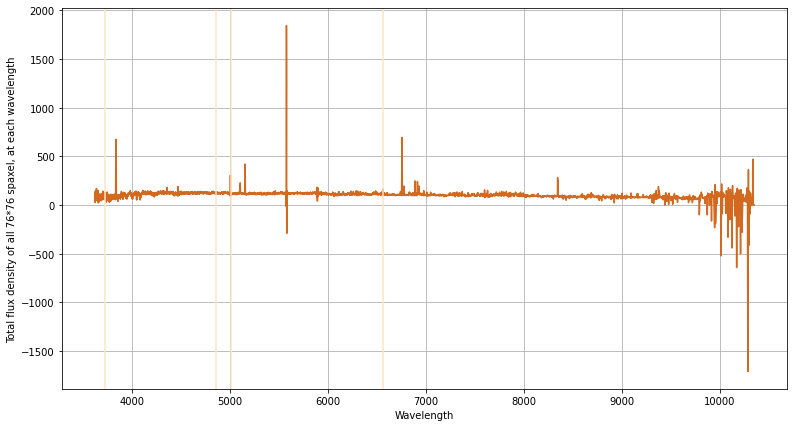

In [26]:
plt.figure(figsize = (13,7))
plt.grid()
plt.plot(wave,lst_now, color = 'chocolate')
plt.axvline(x = 3727, color = 'bisque')
plt.axvline(x = 4861, color = 'bisque')
plt.axvline(x = 5007, color = 'bisque')
plt.axvline(x = 6563, color = 'bisque')
plt.xlabel('Wavelength')
plt.ylabel('Total flux density of all 76*76 spaxel, at each wavelength')

In [27]:
drpall = fits.open('/Users/natachaupra/Downloads/drpall-v2_4_3.fits')
tbdata = drpall[1].data
val = 0
for i in range(len(tbdata)):
    if tbdata[i][0] == 8312:
        if tbdata[i][1] == '12701':
            val = tbdata[i]
#             print(tbdata[i])
print('redshift =', val['nsa_z'])
redshift = val['nsa_z']

redshift = 0.0293829


O[II] 3727

H$\beta$ 4861

O[III] 5007

H$\alpha$ 6563

## O[II] 3727 observed wavelength

Text(0, 0.5, 'Total flux density of all 76*76 spaxel, at each wavelength')

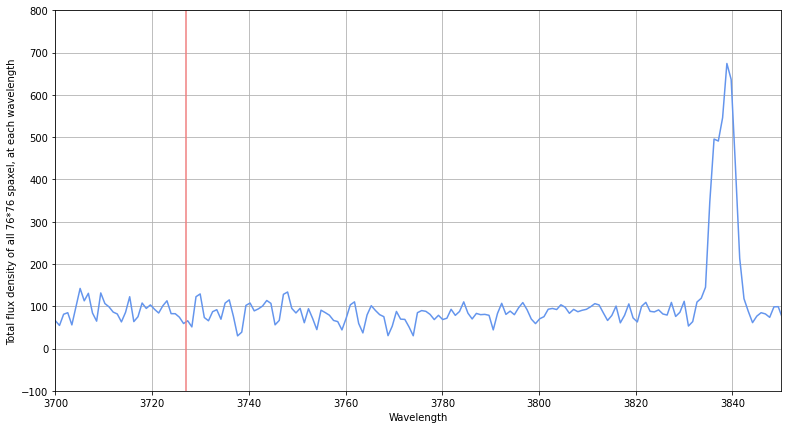

In [28]:
plt.figure(figsize = (13,7))
plt.xlim(3700,3850)
plt.ylim(-100,800)
plt.grid()
plt.plot(wave,lst_now, color = 'cornflowerblue')
plt.axvline(x=3727,color='lightcoral')
plt.xlabel('Wavelength')
plt.ylabel('Total flux density of all 76*76 spaxel, at each wavelength')

## H$\beta$ 4861 observed wavelength

Text(0, 0.5, 'Total flux density of all 76*76 spaxel, at each wavelength')

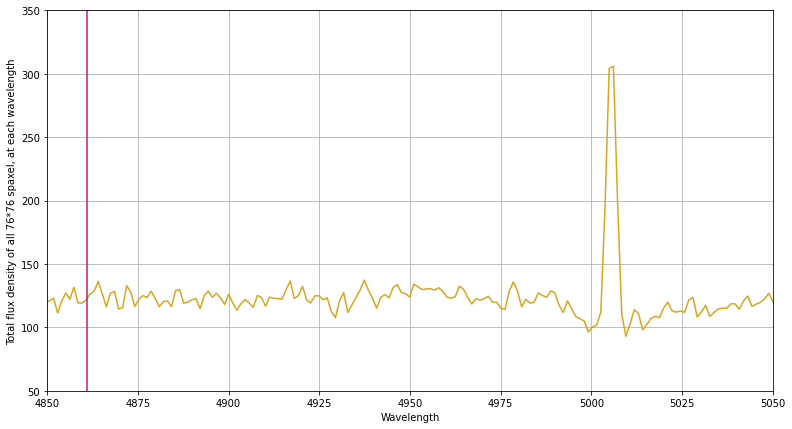

In [29]:
plt.figure(figsize = (13,7))
plt.xlim(4850,5050)
plt.ylim(50,350)
plt.grid()
plt.plot(wave,lst_now, color = 'goldenrod')
plt.axvline(x=4861,color= 'mediumvioletred')
plt.xlabel('Wavelength')
plt.ylabel('Total flux density of all 76*76 spaxel, at each wavelength')

## O[III] 5007 observed wavelength

Text(0, 0.5, 'Total flux density of all 76*76 spaxel, at each wavelength')

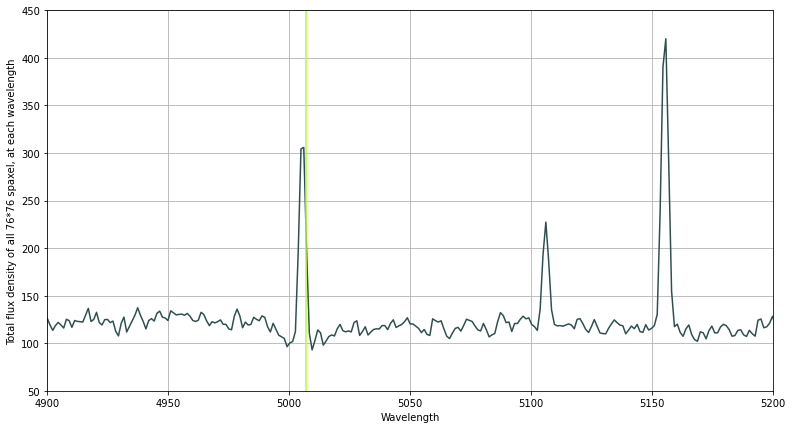

In [30]:
plt.figure(figsize = (13,7))
plt.xlim(4900,5200)
plt.ylim(50,450)
plt.grid()
plt.plot(wave,lst_now, color = 'darkslategray')
plt.axvline(x=5007,color= 'greenyellow')
plt.xlabel('Wavelength')
plt.ylabel('Total flux density of all 76*76 spaxel, at each wavelength')

## H$\alpha$ 6563 observed wavelength

Text(0, 0.5, 'Total flux density of all 76*76 spaxel, at each wavelength')

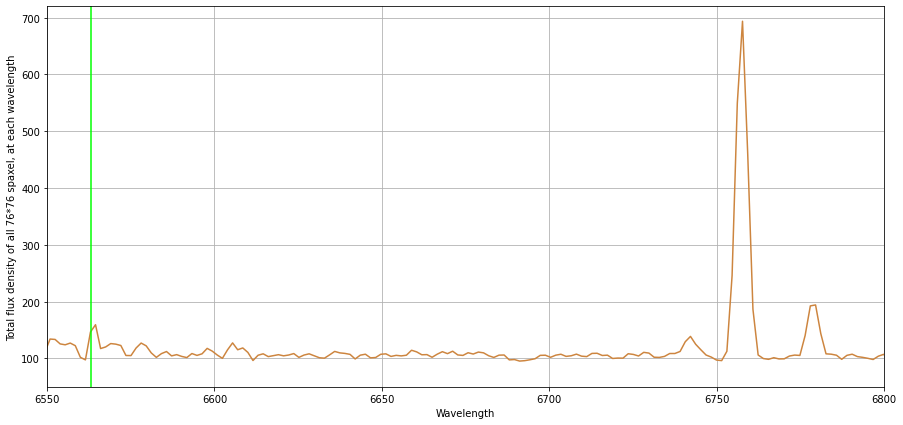

In [31]:
plt.figure(figsize = (15,7))
plt.xlim(6550,6800)
plt.ylim(50,720)
plt.grid()
plt.plot(wave,lst_now, color = 'peru')
plt.axvline(x=6563,color= 'lime')
plt.xlabel('Wavelength')
plt.ylabel('Total flux density of all 76*76 spaxel, at each wavelength')

### Finding observed wavelength at H$\alpha$

Text(0, 0.5, 'Total flux density of all 76*76 spaxel, at each wavelength')

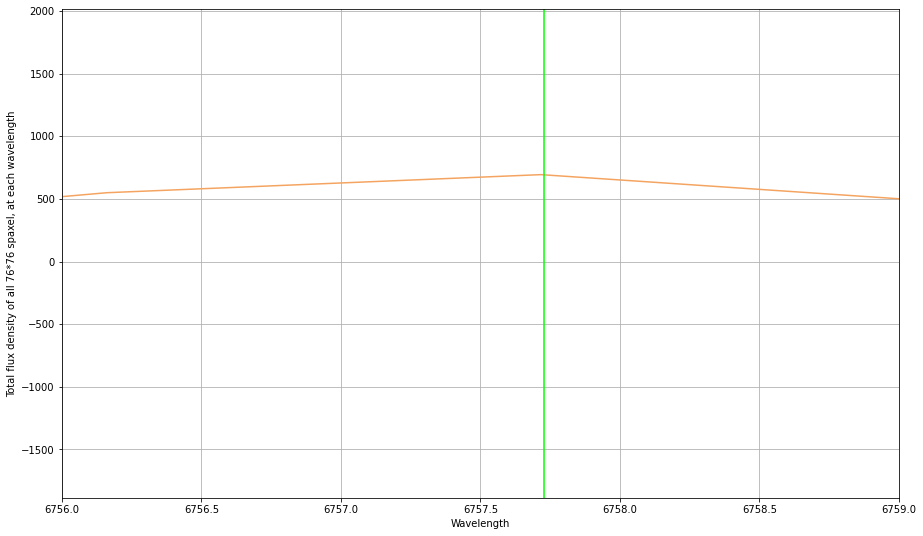

In [32]:
plt.figure(figsize = (15,9))
plt.xlim(6756,6759)
plt.grid()
plt.plot(wave,lst_now, color = 'sandybrown')
plt.axvline(x=6757.73,color= 'lime')
plt.xlabel('Wavelength')
plt.ylabel('Total flux density of all 76*76 spaxel, at each wavelength')

## Change observed wavelength to rest frame (emitted) wavelength

In [33]:
rest_frame_wavelength = np.array([wavelength / (1+redshift) for wavelength in wave])

In [34]:
3621.59598486/(1+0.0293829)

3518.220464765832

In [35]:
type(rest_frame_wavelength)

numpy.ndarray

In [36]:
print(rest_frame_wavelength)

[ 3518.22046477  3519.03065824  3519.84103829 ... 10053.63352962
 10055.94873083 10058.26446519]


In [37]:
# for i in range(100):
#     print('obs : ', wave[i], ',', 'emit : ', rest_frame_wavelength[i])

# 1D flux density of all 76*76 spaxels, at each rest frame wavelength

Text(0, 0.5, 'Total flux density of all 76*76 spaxel, at each wavelength')

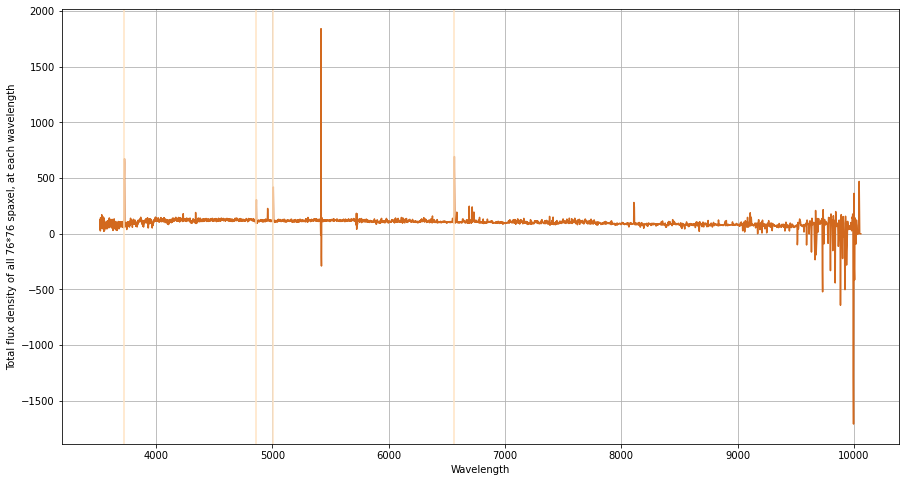

In [38]:
plt.figure(figsize = (15,8))
plt.grid()
plt.plot(rest_frame_wavelength,lst_now, color = 'chocolate')
plt.axvline(x = 3727, color = 'bisque')
plt.axvline(x = 4861, color = 'bisque')
plt.axvline(x = 5007, color = 'bisque')
plt.axvline(x = 6563, color = 'bisque')
plt.xlabel('Wavelength')
plt.ylabel('Total flux density of all 76*76 spaxel, at each wavelength')

## O[II] 3727 rest frame wavelength

Text(0, 0.5, 'Total flux density of all 76*76 spaxel, at each wavelength')

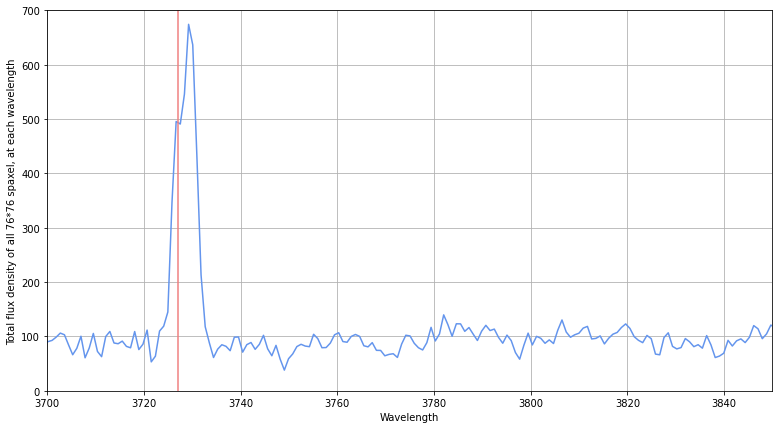

In [39]:
plt.figure(figsize = (13,7))
plt.xlim(3700,3850)
plt.ylim(0,700)
plt.grid()
plt.plot(rest_frame_wavelength,lst_now, color = 'cornflowerblue')
plt.axvline(x=3727,color='lightcoral')
plt.xlabel('Wavelength')
plt.ylabel('Total flux density of all 76*76 spaxel, at each wavelength')

## H$\beta$ 4861 rest frame wavelength

Text(0, 0.5, 'Total flux density of all 76*76 spaxel, at each wavelength')

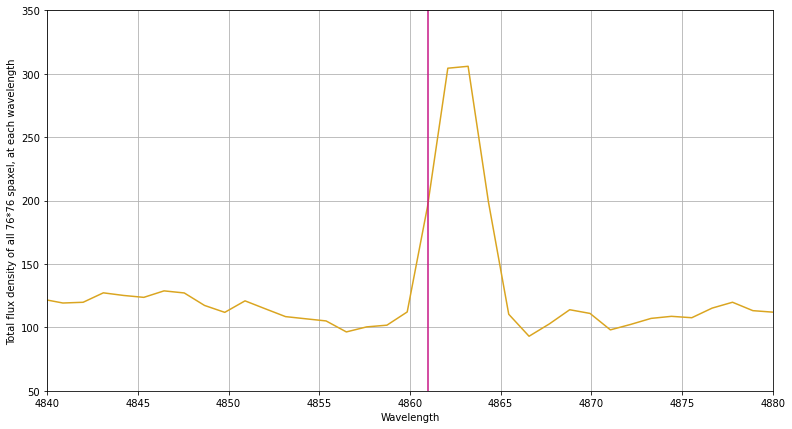

In [40]:
plt.figure(figsize = (13,7))
plt.xlim(4840,4880)
plt.ylim(50,350)
plt.grid()
plt.plot(rest_frame_wavelength,lst_now, color = 'goldenrod')
plt.axvline(x=4861,color= 'mediumvioletred')
plt.xlabel('Wavelength')
plt.ylabel('Total flux density of all 76*76 spaxel, at each wavelength')

## O[III] 5007 rest frame wavelength

Text(0, 0.5, 'Total flux density of all 76*76 spaxel, at each wavelength')

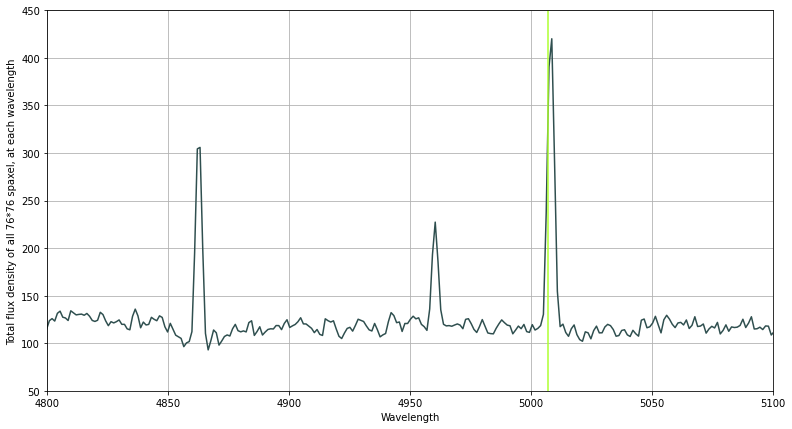

In [41]:
plt.figure(figsize = (13,7))
plt.xlim(4800,5100)
plt.ylim(50,450)
plt.grid()
plt.plot(rest_frame_wavelength,lst_now, color = 'darkslategray')
plt.axvline(x=5007,color= 'greenyellow')
plt.xlabel('Wavelength')
plt.ylabel('Total flux density of all 76*76 spaxel, at each wavelength')

## H$\alpha$ 6563 rest frame wavelength

Text(0, 0.5, 'Total flux density of all 76*76 spaxel, at each wavelength')

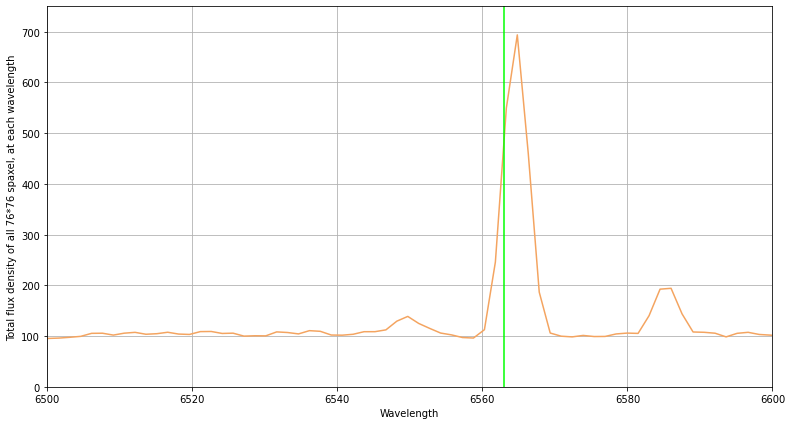

In [42]:
plt.figure(figsize = (13,7))
plt.xlim(6500,6600)
plt.ylim(0,750)
plt.grid()
plt.plot(rest_frame_wavelength,lst_now, color = 'sandybrown')
plt.axvline(x=6563,color= 'lime')
plt.xlabel('Wavelength')
plt.ylabel('Total flux density of all 76*76 spaxel, at each wavelength')

## Shifting redshift value


Text(0, 0.5, 'Total flux density of all 76*76 spaxel, at each wavelength')

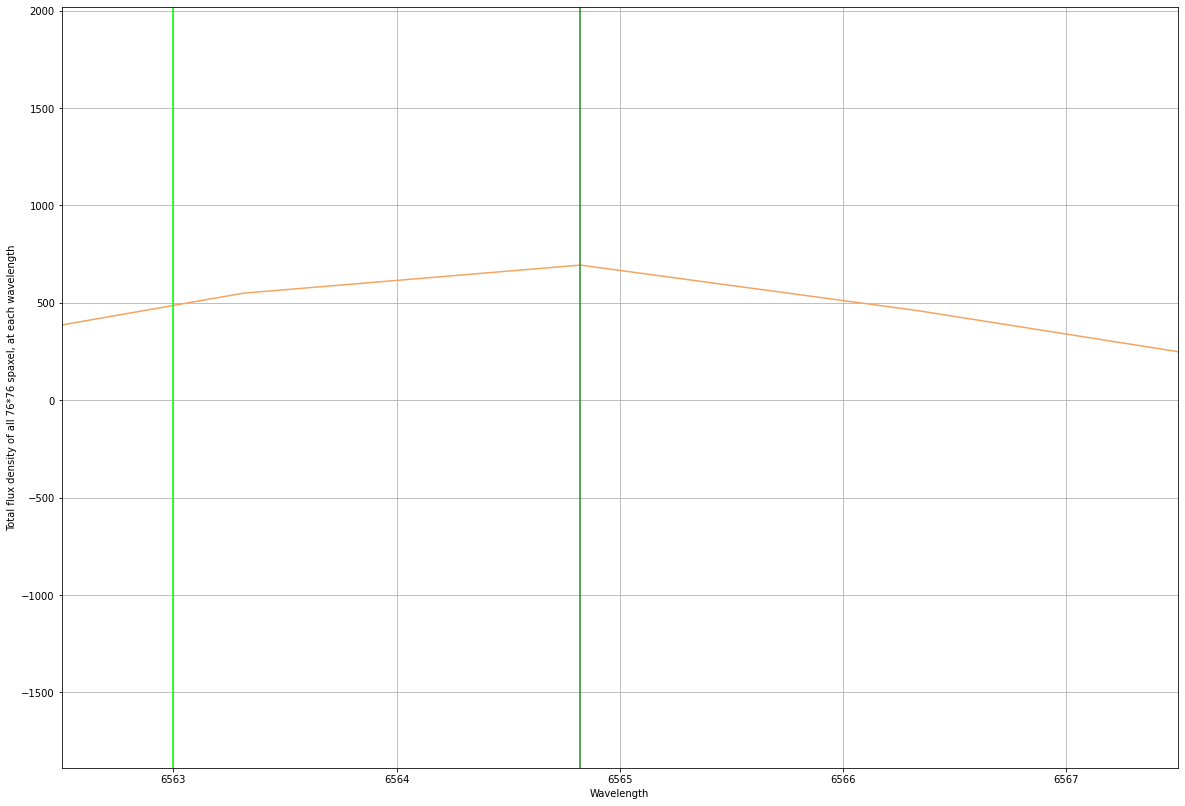

In [43]:
plt.figure(figsize = (20,14))
plt.xlim(6562.5,6567.5)
plt.grid()
plt.plot(rest_frame_wavelength,lst_now, color = 'sandybrown')
plt.axvline(x = 6563 , color = 'lime')
plt.axvline(x = 6564.82 , color = 'forestgreen')
plt.xlabel('Wavelength')
plt.ylabel('Total flux density of all 76*76 spaxel, at each wavelength')

### wavelength (emit) at H$\alpha$ ~ 6564.82 angstrom (estimated from the graph)

### wavelength (obs) at H$\alpha$ ~ 6757.73 angstrom (estimated from the graph)

1 + redshift = $\dfrac{\lambda_{obs}}{\lambda_{emit}}$

In [44]:
new_redshift = (6757.73/6564.82) - 1

In [45]:
print('new redshift from the graph = ',"   ", new_redshift)
print('old redshift from the data file = ', redshift)
# The two values are pretty close 

new redshift from the graph =      0.029385421077805507
old redshift from the data file =  0.0293829


In [46]:
wavelength_at_new_calculated_reshift = [wavelength/(1+new_redshift) for wavelength in wave]

## H$\alpha$ rest frame wavelength with new (estimated) redshift (blue) and rest frame wavelength with old redshift (green)

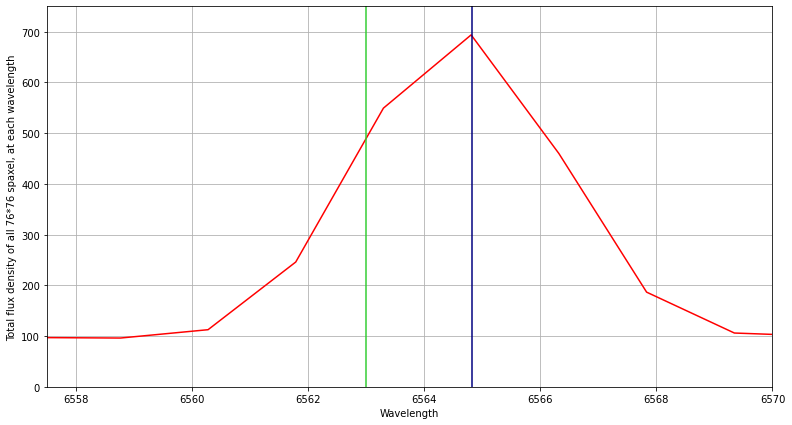

In [47]:
plt.figure(figsize = (13,7))
plt.xlim(6557.5,6570)
plt.ylim(0,750)
plt.grid()
plt.plot(wavelength_at_new_calculated_reshift,lst_now, color = 'red')
plt.axvline(x = 6563, color = 'limegreen')
plt.axvline(x = 6757.73/(1+new_redshift),color= 'navy')
plt.xlabel('Wavelength')
plt.ylabel('Total flux density of all 76*76 spaxel, at each wavelength')

plt.savefig('test_figure') #savefig = save pic , name test_fig

## Comapring two plots

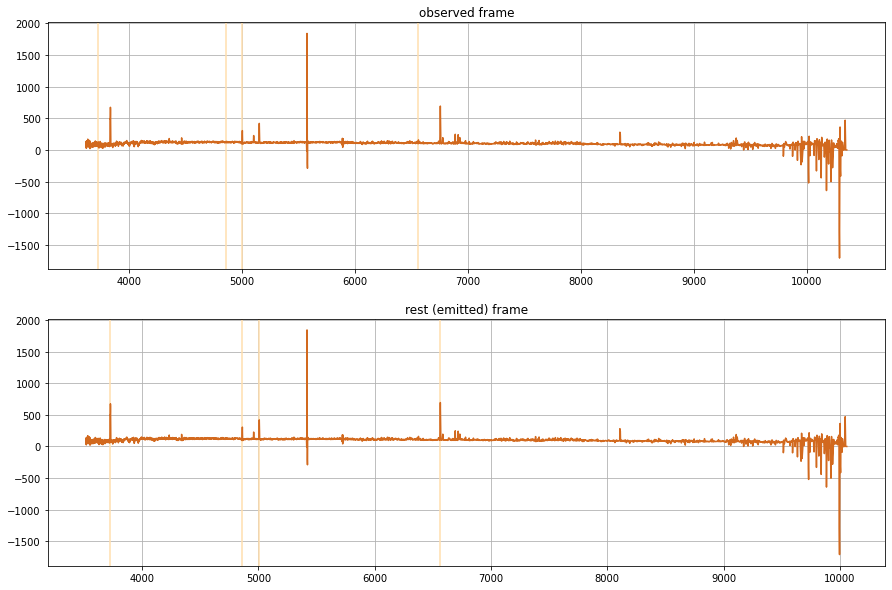

In [48]:
fig, plots = plt.subplots(2,1,figsize = (15,10))

plots[0].grid()
plots[1].grid()
plots[0].axvline(x = 3727, color = 'navajowhite')
plots[0].axvline(x = 4861, color = 'navajowhite')
plots[0].axvline(x = 5007, color = 'navajowhite')
plots[0].axvline(x = 6563, color = 'navajowhite')

plots[1].axvline(x = 3727, color = 'navajowhite')
plots[1].axvline(x = 4861, color = 'navajowhite')
plots[1].axvline(x = 5007, color = 'navajowhite')
plots[1].axvline(x = 6563, color = 'navajowhite')

plots[0].title.set_text('observed frame')
plots[1].title.set_text('rest (emitted) frame')

plots[0].plot(wave,lst_now, color = 'chocolate')
plots[1].plot(rest_frame_wavelength, lst_now, color= 'chocolate')



In [49]:
redshift

0.0293829

In [50]:
wavelength_range =  np.where((wave / (1 + redshift) > 6363) & (wave / (1 + redshift) < 6763))[0] 
# wavelength_range
# gives the range of the index of wavelength that is 6363 < x < 6763

In [51]:
emitted_wavelength_read_from_graph = 6564.82

## Finding the index of the wavelength

In [52]:
wavelength_at_new_calculated_reshift = np.array(wavelength_at_new_calculated_reshift)


In [53]:
index = np.where(wavelength_at_new_calculated_reshift == 6564.807364842294)
index

(array([2709]),)

## Finding the list that I wanna histogram on 

In [54]:
# list_i_wanna_histogram_on = np.array([])

# for i in range(76):
#     for j in range(76):
#         list_i_wanna_histogram_on = np.append(list_i_wanna_histogram_on,flux[i][j][2709])



### Making the bin 

In [55]:
counter = -0.04
bins_list2 = [-0.04]
for i in range(3500):
    counter += 0.0005
    bins_list2.append(counter)
     

In [56]:
# np.average(list_i_wanna_histogram_on)

In [57]:
# np.histogram(list_i_wanna_histogram_on)

## Histogram of the whole list

In [58]:
# counter = 0.0001
# bins_list = [0.0001]
# for i in range(1000):
#     counter += 0.0005
#     bins_list.append(counter)

In [59]:
# len(bins_list2)

In [60]:
# emptylst = [] 
# count2 = 0
# for i in list_i_wanna_histogram_on:
#     for j in range(len(bins_list2)-1):
#         if i >= bins_list2[j] and i < bins_list2[j+1]:
#             count2 += 1
#     emptylst.append(count2)
#     count2 = 0
    

In [61]:
# sum(emptylst)

In [62]:
# plt.figure(figsize=(18,7))
# plt.grid()
# # plt.axvline(x=0.018,color="orange")
# plt.hist(sorted(list_i_wanna_histogram_on),bins=bins_list,color = 'mediumpurple');

In [63]:
(list_i_wanna_histogram_on ==0.0).sum()

NameError: name 'list_i_wanna_histogram_on' is not defined

In [ ]:
# plt.figure(figsize=(18,12))
# plt.grid()
# plt.ylim(0,2500)
# plt.xlim(-0.05,0.1)
# plt.hist(sorted(list_i_wanna_histogram_on),bins=bins_list2,color = 'orangered');

## Limiting range of plot above to -0.05 - 0.1

In [ ]:
# plt.figure(figsize=(18,12))
# plt.grid()
# plt.axis([-0.05,0.1,0,40])
# plt.hist(sorted(list_i_wanna_histogram_on),bins=bins_list2,color = 'seagreen');

In [ ]:
# for i in list_i_wanna_histogram_on:
#     print(i)
# print(min(list_i_wanna_histogram_on))

In [ ]:
# broken_list_from_minus0p05_to_0p1 = []

# for i in list_i_wanna_histogram_on:
#     if i>= -0.05 and i <= 0.1:
#         broken_list_from_minus0p05_to_0p1.append(i)
        
# broken_list_from_minus0p05_to_0p1 = np.array(broken_list_from_minus0p05_to_0p1)

In [ ]:
# broken_list_from_minus0p05_to_0p1

## New mean and New std

In [ ]:
new_mean = np.mean(broken_list_from_minus0p05_to_0p1)
new_mean

In [ ]:
new_std = np.std(broken_list_from_minus0p05_to_0p1)
new_std

## New normal distribution

In [ ]:
plt.figure(figsize = (15,7))
x_values = np.linspace(-0.05,0.1,1000)
y_values = stats.norm(new_mean, new_std)
plt.grid()
plt.plot(x_values, y_values.pdf(x_values),color='fuchsia')


## Combining them (this is wrong)

In [ ]:
plt.figure(figsize=(18,12))
plt.grid()
plt.axis([-0.05,0.1,0,40])
plt.hist(sorted(list_i_wanna_histogram_on),bins=bins_list2,color = 'palegreen');
plt.axvline(0.07749251962198825, color = 'red', linewidth = 3)
plt.axvline(new_mean, color = 'blue', linewidth = 3)
plt.plot(x_values, y_values.pdf(x_values)*1.5,color='fuchsia')


# for some reason there is a peak at 0 for this plot but not the red plot above. Or I didn't see it ?

In [ ]:
# 3 * sigma 
3 * new_std

In [ ]:
new_mean-3*new_std

## The histogram (updated) - with 0's removed

In [ ]:
#making the array
new_lst_i_wanna_histogram_on = np.array(flux[:,:,2709])
#flatten 2D into 1D array
new_lst_i_wanna_histogram_on = new_lst_i_wanna_histogram_on.flatten()
#delete 0 from the array 
new_lst_i_wanna_histogram_on = np.delete(new_lst_i_wanna_histogram_on, np.where(new_lst_i_wanna_histogram_on == 0.0))
len(new_lst_i_wanna_histogram_on)

In [ ]:
# just checkin
2429+3347
# there are 2429 zeros

In [ ]:
plt.figure(figsize=(18,12))
plt.hist(new_lst_i_wanna_histogram_on,bins = bins_list2,color = 'royalblue');
plt.grid()
plt.xlim(-0.05,0.1)
plt.ylim(0,40)

In [ ]:
new_lst_i_wanna_histogram_on = np.array(sorted(new_lst_i_wanna_histogram_on))
# new_lst_i_wanna_histogram_on

In [ ]:
#index 0.012904778 = 580
#cut the right half of the list away
new_lst_i_wanna_histogram_on = new_lst_i_wanna_histogram_on[:581]

In [ ]:
bins_list2 = bins_list2[:107]

In [ ]:
bins_list2[-1]

### Histogram again with the right half cut away 

In [ ]:
plt.figure(figsize=(18,12))
dataset = plt.hist(new_lst_i_wanna_histogram_on,bins = bins_list2,color = 'hotpink');
plt.grid()
plt.xlim(-0.05,0.02)
plt.ylim(0,40)

In [ ]:
def gaussian(x, amp, cen, wid):
    cen = new_mean
    return amp * np.exp(-(x-cen)**2 / wid)

In [ ]:
datasetlst = dataset[0].tolist()
datasetlst.append(0.0)
len(datasetlst)
datasetlst = np.array(datasetlst)

In [ ]:
popt, pcov = curve_fit(gaussian, bins_list2, datasetlst)
print(popt,pcov)

In [ ]:
plt.figure(figsize=(18,12))
plt.plot(bins_list2,gaussian(bins_list2,2.47722882e+01,7.08883103e-03,3.85919221e-05),linewidth = 3,color = 'blue')
plt.plot(bins_list2,gaussian(bins_list2,popt[0],popt[1],popt[2]),linewidth = 3,color = 'forestgreen')
plt.hist(new_lst_i_wanna_histogram_on,bins = bins_list2,color = 'hotpink');
plt.grid()
plt.xlim(-0.05,0.02)
plt.ylim(0,40)

## Every single flux density value, at all wavelengths, at a single point in the sky (1 spaxel)

In [ ]:
# at_31_32 = []
# for i in flux[31][32]:
#     at_31_32.append(i)
# plt.figure(figsize = (20,10))
# plt.grid()
# plt.plot(wave,at_31_32, color = 'teal')
# plt.xlabel("INDEX from 0 - 4563")
# plt.ylabel("FLUX DENSITY")


In [ ]:
# wave = data['WAVE'].data #observed wavelength
# flux_header = data['FLUX'].header #which is the same as data[1].header

In [ ]:
# wave

In [ ]:
# flux_header

In [ ]:
# x_center = int(flux_header['CRPIX1']) - 1
# y_center = int(flux_header['CRPIX2']) - 1

# # referenced pixel (1-indexed = index starts from 1 ?)

In [ ]:
# flux : 2d array with 76 subarrays, each array is 4563 items long OMG
# len(flux[0][56])

In [ ]:
# plt.plot(wave, flux[x_center, y_center]);
# plt.xlabel('$\lambda \, [\AA]$') #lambda in unit angstrom
# plt.ylabel(flux_header['BUNIT']) # specific intensity per spaxel (space+pixel)
# plt.show()

In [ ]:
# do_not_use = (mask & 2**10) != 0 # T/F array with only T values ?
# flux_m = np.ma.array(flux, mask=do_not_use) # np.ma.array = masked array = an array with possible some masked value

In [ ]:
# plt.plot(k)

In [ ]:
# drpall = fits.open('/Users/natachaupra/Downloads/drpall-v2_4_3.fits')
# tbdata = drpall[1].data
# val = 0
# for i in range(len(tbdata)):
#     if tbdata[i][0] == 8312:
#         if tbdata[i][1] == '12701':
#             val = tbdata[i]
# #             print(tbdata[i])
# print('redshift =', val['nsa_z'])


# # ind = np.where(tbdata['mangaid'] == '8312-12701')
# # print(ind)
# # print('redshift =', tbdata['nsa_z'][ind][0])

In [ ]:
# drpall.info()

In [ ]:

# drpall[1].header

In [ ]:
# drpall[1].data['mangaid']

In [ ]:
# drpall[1].data['nsa_z'][np.where(drpall[1].data['mangaid'] == '7-18517934')[0]]

In [ ]:
# tbdata

In [ ]:
# redshift = 0.0293829
# ind_wave = np.where((wave / (1 + redshift) > 6550) & (wave / (1 + redshift) < 6680))[0] 

# # how did they choose the number 6550 and 6680 again ?

# halpha = flux_m[:, :, ind_wave].sum(axis=2)
# im = halpha.T

# # Convert from array indices to arcsec relative to IFU center
# dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
# dy = flux_header['CD2_2'] * 3600.  # deg to arcsec


# x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
# y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy
# extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]


In [ ]:
# ind_wave,len(ind_wave)

In [ ]:
# halpha,len(halpha) 

In [ ]:
# print('x_extent',x_extent)
# print('y_extent',y_extent)
# # print('extent',extent)

In [ ]:
# plt.imshow(im, extent=extent, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none');
# plt.colorbar(label=flux_header['BUNIT']) #specific intensity per spaxel
# plt.xlabel('arcsec')
# plt.ylabel('arcsec')
# plt.show()

# print('Now how do I understand this picture again ?')
# # H alpha narrow band image